In [2]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt
import re
import math


#dataset pre-processing realated imports
import sklearn
from urllib.parse import urlparse
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
#imports related to classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier

#DNN imports
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau

#Explainability imports
from sklearn.inspection import PartialDependenceDisplay


In [3]:
df = pd.read_csv("csic_database.csv")



for feature in df.columns:
    unique_count =df[feature].nunique()
    print(f"Number of unique values for {feature}: {unique_count}")

Number of unique values for Unnamed: 0: 2
Number of unique values for Method: 3
Number of unique values for User-Agent: 1
Number of unique values for Pragma: 1
Number of unique values for Cache-Control: 1
Number of unique values for Accept: 1
Number of unique values for Accept-encoding: 1
Number of unique values for Accept-charset: 1
Number of unique values for language: 1
Number of unique values for host: 2
Number of unique values for cookie: 61065
Number of unique values for content-type: 1
Number of unique values for connection: 2
Number of unique values for lenght: 382
Number of unique values for content: 12091
Number of unique values for classification: 2
Number of unique values for URL: 13498


In [4]:
df = df.drop(['User-Agent', 'Pragma', 'Cache-Control', 'Accept',
         'Accept-encoding', 'Accept-charset', 'language',
         'content-type'], axis=1)


In [5]:
df.columns

Index(['Unnamed: 0', 'Method', 'host', 'cookie', 'connection', 'lenght',
       'content', 'classification', 'URL'],
      dtype='object')

In [6]:
X = df.copy()
y = X['Unnamed: 0']
print(y)

0           Normal
1           Normal
2           Normal
3           Normal
4           Normal
           ...    
61060    Anomalous
61061    Anomalous
61062    Anomalous
61063    Anomalous
61064    Anomalous
Name: Unnamed: 0, Length: 61065, dtype: object


<Axes: ylabel='count'>

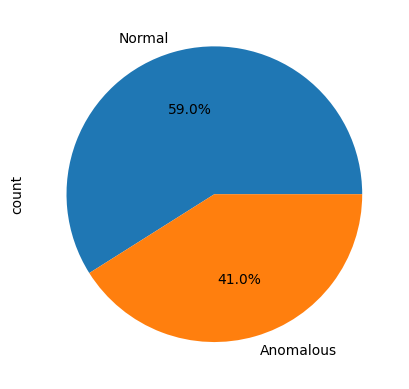

In [7]:
df['Unnamed: 0'].value_counts().plot(kind = 'pie', autopct = "%1.1f%%")

In [8]:
df.head()

,Unnamed: 0,Method,host,cookie,connection,lenght,content,classification,URL
0,Normal,GET,localhost:8080,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,close,NaN,NaN,0,http://localhost:8080/tienda1/index.jsp HTTP/1.1
1,Normal,GET,localhost:8080,JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5,close,NaN,NaN,0,http://localhost:8080/tienda1/publico/anadir.j...
2,Normal,POST,localhost:8080,JSESSIONID=933185092E0B668B90676E0A2B0767AF,Connection: close,Content-Length: 68,id=3&nombre=Vino+Rioja&precio=100&cantidad=55&...,0,http://localhost:8080/tienda1/publico/anadir.j...
3,Normal,GET,localhost:8080,JSESSIONID=8FA18BA82C5336D03D3A8AFA3E68CBB0,close,NaN,NaN,0,http://localhost:8080/tienda1/publico/autentic...
4,Normal,POST,localhost:8080,JSESSIONID=7104E6C68A6BCF1423DAE990CE49FEE2,Connection: close,Content-Length: 63,modo=entrar&login=choong&pwd=d1se3ci%F3n&remem...,0,http://localhost:8080/tienda1/publico/autentic...


In [9]:
df.tail()

,Unnamed: 0,Method,host,cookie,connection,lenght,content,classification,URL
61060,Anomalous,GET,localhost:8080,JSESSIONID=62216ADBBD9B91E17CA9AFEDCCC36275,close,NaN,NaN,1,http://localhost:8080/tienda1/miembros/editar....
61061,Anomalous,POST,localhost:8080,JSESSIONID=2317F5C0B1B7FAD18EB425E98DB102A3,Connection: close,Content-Length: 255,modo=registro&login=beaumont&password=quEratIt...,1,http://localhost:8080/tienda1/miembros/editar....
61062,Anomalous,GET,localhost:8080,JSESSIONID=7F0BA54A88B849EF752006D388E15CDD,close,NaN,NaN,1,http://localhost:8080/tienda1/miembros/editar....
61063,Anomalous,GET,localhost:8080,JSESSIONID=FB018FFB06011CFABD60D8E8AD58CA21,close,NaN,NaN,1,http://localhost:8080/tienda1/imagenes/3.gif/ ...
61064,Anomalous,GET,localhost:8080,JSESSIONID=3CC12010CDA952F123240EBAD79B55CC,close,NaN,NaN,1,http://localhost:8080/tienda1/imagenes/nuestra...


In [10]:
# Removing not discriminatory Features and making some adjustments on feature names
X = X.rename(columns={'Unnamed: 0': 'Class'})
X = X.rename(columns={'lenght': 'content_length'})


feature_names=[ 'Class','Method','host','cookie', 'content_length', 'content','classification','URL']

# Print the remaining data
X = X[feature_names]
print(X)

           Class Method            host  \
0         Normal    GET  localhost:8080   
1         Normal    GET  localhost:8080   
2         Normal   POST  localhost:8080   
3         Normal    GET  localhost:8080   
4         Normal   POST  localhost:8080   
...          ...    ...             ...   
61060  Anomalous    GET  localhost:8080   
61061  Anomalous   POST  localhost:8080   
61062  Anomalous    GET  localhost:8080   
61063  Anomalous    GET  localhost:8080   
61064  Anomalous    GET  localhost:8080   

                                            cookie       content_length  \
0      JSESSIONID=1F767F17239C9B670A39E9B10C3825F4                  NaN   
1      JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5                  NaN   
2      JSESSIONID=933185092E0B668B90676E0A2B0767AF   Content-Length: 68   
3      JSESSIONID=8FA18BA82C5336D03D3A8AFA3E68CBB0                  NaN   
4      JSESSIONID=7104E6C68A6BCF1423DAE990CE49FEE2   Content-Length: 63   
...                              

In [11]:
y=X.Class
print(y)

0           Normal
1           Normal
2           Normal
3           Normal
4           Normal
           ...    
61060    Anomalous
61061    Anomalous
61062    Anomalous
61063    Anomalous
61064    Anomalous
Name: Class, Length: 61065, dtype: object


In [12]:
#replace NaN values with 0
#removing the 'Content-Lenght' string and keeping only the numerical value

X['content_length'] = X['content_length'].astype(str)
X['content_length'] = X['content_length'].str.extract(r'(\d+)')
X['content_length'] = pd.to_numeric(X['content_length'], errors='coerce').fillna(0)
print(X.content_length)

0          0.0
1          0.0
2         68.0
3          0.0
4         63.0
         ...  
61060      0.0
61061    255.0
61062      0.0
61063      0.0
61064      0.0
Name: content_length, Length: 61065, dtype: float64


In [13]:
filtered_length = X.loc[X['Method'] == 'GET', 'content_length']
print(filtered_length)

0        0.0
1        0.0
3        0.0
5        0.0
7        0.0
        ... 
61058    0.0
61060    0.0
61062    0.0
61063    0.0
61064    0.0
Name: content_length, Length: 43088, dtype: float64


In [14]:
X['Method'].value_counts()

Method
GET     43088
POST    17580
PUT       397
Name: count, dtype: int64

In [15]:
url_counts = X['URL'].value_counts()
most_common_urls = url_counts.head(20)  # Extract the top 20 most common strings

print("Most common URLs:")
for i, (url, count) in enumerate(most_common_urls.items(), 1):
    print(f"{i}. URL: {url} - Count: {count}")

Most common URLs:
1. URL: http://localhost:8080/tienda1/publico/anadir.jsp HTTP/1.1 - Count: 2441
2. URL: http://localhost:8080/tienda1/publico/autenticar.jsp HTTP/1.1 - Count: 2422
3. URL: http://localhost:8080/tienda1/publico/registro.jsp HTTP/1.1 - Count: 2417
4. URL: http://localhost:8080/tienda1/miembros/editar.jsp HTTP/1.1 - Count: 2412
5. URL: http://localhost:8080/tienda1/publico/pagar.jsp HTTP/1.1 - Count: 2379
6. URL: http://localhost:8080/tienda1/publico/caracteristicas.jsp HTTP/1.1 - Count: 2003
7. URL: http://localhost:8080/tienda1/publico/vaciar.jsp HTTP/1.1 - Count: 1965
8. URL: http://localhost:8080/tienda1/publico/entrar.jsp HTTP/1.1 - Count: 1938
9. URL: http://localhost:8080/tienda1/publico/carrito.jsp HTTP/1.1 - Count: 1000
10. URL: http://localhost:8080/tienda1/publico/entrar.jsp?errorMsg=Credenciales+incorrectas HTTP/1.1 - Count: 1000
11. URL: http://localhost:8080/tienda1/imagenes/cmenbul.gif HTTP/1.1 - Count: 1000
12. URL: http://localhost:8080/tienda1/miembros/

In [16]:
def count_dot(url):
    count_dot = url.count('.')
    return count_dot


def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')

def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')

def shortening_service(url):
    match = re.search(r'bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                  r'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                  r'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                  r'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                  r'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                  r'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                  r'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                  r'tr\.im|link\.zip\.net',
                  url)
    if match:
        return 1
    else:
        return 0


def count_http(url):
    return url.count('http')

def count_per(url):
    return url.count('%')

def count_ques(url):
    return url.count('?')

def count_hyphen(url):
    return url.count('-')


def count_equal(url):
    return url.count('=')


def url_length(url):
    return len(str(url))

#Hostname Length

def hostname_length(url):
    return len(urlparse(url).netloc)


import re

def suspicious_words(url):
    score_map = {
        'error': 30,
        'errorMsg': 30,
        'id': 10,
        'errorID': 30,
        'SELECT': 50,
        'FROM': 50,
        'WHERE': 50,
        'DELETE': 50,
        'USERS': 50,
        'DROP': 50,
        'CREATE': 50,
        'INJECTED': 50,
        'TABLE': 50,
        'alert': 30,
        'javascript': 20,
        'cookie': 25,
        '--': 30,
        '.exe': 30,
        '.php': 20,
        '.js': 10,
        'admin': 10,
        'administrator': 10,
        r'\'': 30,
        'password': 15,
        'login': 15,
        'incorrect': 20,
        'pwd': 15,
        'tamper': 25,
        'vaciar': 20,
        'carrito': 25,
        'wait': 30,
        'delay': 35,
        'set': 20,
        'steal': 35,
        'hacker': 35,
        'proxy': 35,
        'location': 30,
        'document.cookie': 40,
        'document': 20,
        'set-cookie': 40,
        'create': 40,
        'cmd': 40,
        'dir': 30,
        'shell': 40,
        'reverse': 30,
        'bin': 20,
        'cookiesteal': 40,
        'LIKE': 30,
        'UNION': 35,
        'include': 30,
        'file': 20,
        'tmp': 25,
        'ssh': 40,
        'exec': 30,
        'cat': 25,
        'etc': 30,
        'fetch': 25,
        'eval': 30,
        'wait': 30,
        'malware': 45,
        'ransomware': 45,
        'phishing': 45,
        'exploit': 45,
        'virus': 45,
        'trojan': 45,
        'backdoor': 45,
        'spyware': 45,
        'rootkit': 45,
        'credential': 30,
        'inject': 30,
        'script': 25,
        'iframe': 25,
        'src=': 25,
        'onerror': 30,
        'prompt': 20,
        'confirm': 20,
        'eval': 25,
        'expression': 30,
        r'function\(': 20,
        'xmlhttprequest': 30,
        'xhr': 20,
        'window.': 20,
        'document.': 20,
        'cookie': 25,
        'click': 15,
        'mouseover': 15,
        'onload': 20,
        'onunload': 20,
    }

    matches = re.findall(r'(?i)' + '|'.join(score_map.keys()), url)

    total_score = sum(score_map.get(match.lower(), 0) for match in matches)
    return total_score


def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters += 1
    return letters

def count_special_characters(url):
    special_characters = re.sub(r'[a-zA-Z0-9\s]', '', url)
    count = len(special_characters)
    return count


# Number of Parameters in URL
def number_of_parameters(url):
    params = urlparse(url).query
    return 0 if params == '' else len(params.split('&'))

# Number of Fragments in URL
def number_of_fragments(url):
    frags = urlparse(url).fragment
    return len(frags.split('#')) - 1 if frags == '' else 0

# URL is Encoded
def is_encoded(url):
    return int('%' in url.lower())


def unusual_character_ratio(url):
    total_characters = len(url)
    unusual_characters = re.sub(r'[a-zA-Z0-9\s\-._]', '', url)
    unusual_count = len(unusual_characters)
    ratio = unusual_count / total_characters if total_characters > 0 else 0
    return ratio

In [17]:
X

,Class,Method,host,cookie,content_length,content,classification,URL
0,Normal,GET,localhost:8080,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,0.0,NaN,0,http://localhost:8080/tienda1/index.jsp HTTP/1.1
1,Normal,GET,localhost:8080,JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5,0.0,NaN,0,http://localhost:8080/tienda1/publico/anadir.j...
2,Normal,POST,localhost:8080,JSESSIONID=933185092E0B668B90676E0A2B0767AF,68.0,id=3&nombre=Vino+Rioja&precio=100&cantidad=55&...,0,http://localhost:8080/tienda1/publico/anadir.j...
3,Normal,GET,localhost:8080,JSESSIONID=8FA18BA82C5336D03D3A8AFA3E68CBB0,0.0,NaN,0,http://localhost:8080/tienda1/publico/autentic...
4,Normal,POST,localhost:8080,JSESSIONID=7104E6C68A6BCF1423DAE990CE49FEE2,63.0,modo=entrar&login=choong&pwd=d1se3ci%F3n&remem...,0,http://localhost:8080/tienda1/publico/autentic...
...,...,...,...,...,...,...,...,...
61060,Anomalous,GET,localhost:8080,JSESSIONID=62216ADBBD9B91E17CA9AFEDCCC36275,0.0,NaN,1,http://localhost:8080/tienda1/miembros/editar....
61061,Anomalous,POST,localhost:8080,JSESSIONID=2317F5C0B1B7FAD18EB425E98DB102A3,255.0,modo=registro&login=beaumont&password=quEratIt...,1,http://localhost:8080/tienda1/miembros/editar....
61062,Anomalous,GET,localhost:8080,JSESSIONID=7F0BA54A88B849EF752006D388E15CDD,0.0,NaN,1,http://localhost:8080/tienda1/miembros/editar....
61063,Anomalous,GET,localhost:8080,JSESSIONID=FB018FFB06011CFABD60D8E8AD58CA21,0.0,NaN,1,http://localhost:8080/tienda1/imagenes/3.gif/ ...


In [18]:
X['count_dot_url'] = X['URL'].apply(count_dot)
X['count_dir_url'] = X['URL'].apply(no_of_dir)
X['count_embed_domain_url'] = X['URL'].apply(no_of_embed)
X['short_url'] = X['URL'].apply(shortening_service)
X['count-http'] = X['URL'].apply(count_http)
X['count%_url'] = X['URL'].apply(count_per)
X['count?_url'] = X['URL'].apply(count_ques)
X['count-_url'] = X['URL'].apply(count_hyphen)
X['count=_url'] = X['URL'].apply(count_equal)
X['hostname_length_url'] = X['URL'].apply(hostname_length)
X['sus_url'] = X['URL'].apply(suspicious_words)
X['count-digits_url'] = X['URL'].apply(digit_count)
X['count-letters_url'] = X['URL'].apply(letter_count)
X['url_length'] = X['URL'].apply(url_length)
X['number_of_parameters_url'] = X['URL'].apply(number_of_parameters)
X['number_of_fragments_url'] = X['URL'].apply(number_of_fragments)
X['is_encoded_url'] = X['URL'].apply(is_encoded)
X['special_count_url'] = X['URL'].apply(count_special_characters)
X['unusual_character_ratio_url'] = X['URL'].apply(unusual_character_ratio)

In [19]:
unique_count = X['cookie'].nunique()

In [22]:
from sklearn.preprocessing import LabelEncoder

# تعريف Encoders منفصلين
method_encoder = LabelEncoder()
host_encoder = LabelEncoder()

# تشفير الأعمدة في الداتا الأصلية X
X["Method_enc"] = method_encoder.fit_transform(X["Method"])
X["host_enc"] = host_encoder.fit_transform(X["host"])





In [23]:


# -----------------------------
# مثال مستقل لتشفير قيم نصية (GET/POST/PUT)
labels = ['GET', 'POST', 'PUT']
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# طباعة النتيجة
print("Encoded labels:", encoded_labels)
print("Original classes:", label_encoder.classes_)


Encoded labels: [0 1 2]
Original classes: ['GET' 'POST' 'PUT']


In [24]:
unique_count_met = X["Method_enc"].nunique()
unique_count_host = X["host_enc"].nunique()



print(f"Number of unique values for 'Method_enc': {unique_count_met}")
print(f"Number of unique values for 'host_enc': {unique_count_host}")


Number of unique values for 'Method_enc': 3
Number of unique values for 'host_enc': 2


In [25]:
X.head()

,Class,Method,host,cookie,content_length,content,classification,URL,count_dot_url,count_dir_url,...,count-digits_url,count-letters_url,url_length,number_of_parameters_url,number_of_fragments_url,is_encoded_url,special_count_url,unusual_character_ratio_url,Method_enc,host_enc
0,Normal,GET,localhost:8080,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,0.0,NaN,0,http://localhost:8080/tienda1/index.jsp HTTP/1.1,2,3,...,7,31,48,0,0,0,9,0.145833,0,0
1,Normal,GET,localhost:8080,JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5,0.0,NaN,0,http://localhost:8080/tienda1/publico/anadir.j...,2,3,...,15,86,126,5,0,1,24,0.174603,0,0
2,Normal,POST,localhost:8080,JSESSIONID=933185092E0B668B90676E0A2B0767AF,68.0,id=3&nombre=Vino+Rioja&precio=100&cantidad=55&...,0,http://localhost:8080/tienda1/publico/anadir.j...,2,4,...,7,39,57,0,0,0,10,0.140351,1,0
3,Normal,GET,localhost:8080,JSESSIONID=8FA18BA82C5336D03D3A8AFA3E68CBB0,0.0,NaN,0,http://localhost:8080/tienda1/publico/autentic...,2,3,...,11,92,125,5,0,1,21,0.152000,0,0
4,Normal,POST,localhost:8080,JSESSIONID=7104E6C68A6BCF1423DAE990CE49FEE2,63.0,modo=entrar&login=choong&pwd=d1se3ci%F3n&remem...,0,http://localhost:8080/tienda1/publico/autentic...,2,4,...,7,43,61,0,0,0,10,0.131148,1,0


In [26]:
def apply_to_content(content,function):
    if pd.isna(content):
        return 0
    elif isinstance(content, str):
        return function(content)

#"""
#                'count_dot_content','count_dir_content','count_embed_domain_content','count%_content','count?_content',
 #               'count-_content','count=_content','hostname_length_content','sus_content','count_digits_content',
  #              'count_letters_content','content_length','number_of_parameters_content','number_of_fragments_content',
   #             'is_encoded_content','special_count_content','unusual_character_ratio_content'
    #            ]"""

X['count_dot_content'] = X['content'].apply(apply_to_content, function=count_dot)
X['count_dir_content'] = X['content'].apply(apply_to_content, function=no_of_dir)
X['count_embed_domain_content'] = X['content'].apply(apply_to_content, function=no_of_embed)
X['count%_content'] = X['content'].apply(apply_to_content, function=count_per)
X['count?_content'] = X['content'].apply(apply_to_content, function=count_ques)
X['count-_content'] = X['content'].apply(apply_to_content, function=count_hyphen)
X['count=_content'] = X['content'].apply(apply_to_content, function=count_equal)
X['content_length'] = X['content'].apply(apply_to_content, function=url_length)
X['sus_content'] = X['content'].apply(apply_to_content, function=suspicious_words)
X['count_digits_content'] = X['content'].apply(apply_to_content, function=digit_count)
X['count_letters_content'] = X['content'].apply(apply_to_content, function=letter_count)
X['special_count_content'] = X['content'].apply(apply_to_content, function=count_special_characters)
X['is_encoded_content'] = X['content'].apply(apply_to_content, function=is_encoded)
#X['unusual_character_ratio_content'] = X['content'].apply(apply_to_content, function=unusual_character_ratio)

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the features and class variable for plotting
new_content_features = ['count_dot_content', 'count_dir_content', 'count_embed_domain_content', 'count%_content', 'count?_content',
                        'count-_content', 'count=_content', 'sus_content', 'count_digits_content',
                        'count_letters_content', 'content_length', 'is_encoded_content', 'special_count_content']

# Create a DataFrame with the selected features
selected_features_df = X[new_content_features]

for feature_name in selected_features_df.columns:
    if feature_name in X.columns:
        unique_count = selected_features_df[feature_name].nunique()
        print(f"Number of unique values for {feature_name}: {unique_count}")
    else:
        print(f"Column '{feature_name}' does not exist in the DataFrame.")

Number of unique values for count_dot_content: 8
Number of unique values for count_dir_content: 1
Number of unique values for count_embed_domain_content: 1
Number of unique values for count%_content: 34
Number of unique values for count?_content: 1
Number of unique values for count-_content: 8
Number of unique values for count=_content: 5
Number of unique values for sus_content: 57
Number of unique values for count_digits_content: 111
Number of unique values for count_letters_content: 230
Number of unique values for content_length: 383
Number of unique values for is_encoded_content: 2
Number of unique values for special_count_content: 87


In [28]:
X.columns

Index(['Class', 'Method', 'host', 'cookie', 'content_length', 'content',
       'classification', 'URL', 'count_dot_url', 'count_dir_url',
       'count_embed_domain_url', 'short_url', 'count-http', 'count%_url',
       'count?_url', 'count-_url', 'count=_url', 'hostname_length_url',
       'sus_url', 'count-digits_url', 'count-letters_url', 'url_length',
       'number_of_parameters_url', 'number_of_fragments_url', 'is_encoded_url',
       'special_count_url', 'unusual_character_ratio_url', 'Method_enc',
       'host_enc', 'count_dot_content', 'count_dir_content',
       'count_embed_domain_content', 'count%_content', 'count?_content',
       'count-_content', 'count=_content', 'sus_content',
       'count_digits_content', 'count_letters_content',
       'special_count_content', 'is_encoded_content'],
      dtype='object')

In [29]:
labels=['count_dot_url', 'count_dir_url', 'count_embed_domain_url', 'count-http',
                'count%_url', 'count?_url', 'count-_url', 'count=_url', 'url_length', 'hostname_length_url',
                'sus_url', 'count-digits_url', 'count-letters_url', 'number_of_parameters_url',
                'is_encoded_url','special_count_url','unusual_character_ratio_url',
                 #method
                'Method_enc',
                #content
                'count_dot_content','count%_content',
                 'count-_content','count=_content','sus_content','count_digits_content',
                  'count_letters_content','content_length',
               'is_encoded_content','special_count_content']

X[labels]
print(len(labels))

28


In [30]:
y=X['classification']
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
61060    1
61061    1
61062    1
61063    1
61064    1
Name: classification, Length: 61065, dtype: int64


In [31]:
print('computing...)')
#split dataset in test and train 
x_tr, x_ts, y_tr, y_ts = train_test_split(X[labels], y, test_size=0.3, random_state=0)


print('Done!')

computing...)
Done!


In [32]:
x_tr.head(5)

,count_dot_url,count_dir_url,count_embed_domain_url,count-http,count%_url,count?_url,count-_url,count=_url,url_length,hostname_length_url,...,count_dot_content,count%_content,count-_content,count=_content,sus_content,count_digits_content,count_letters_content,content_length,is_encoded_content,special_count_content
23480,2,3,0,1,0,1,0,1,91,14,...,0,0,0,0,0,0,0,0,0,0
45171,2,3,0,1,14,1,2,1,125,14,...,0,0,0,0,0,0,0,0,0,0
9460,2,4,0,1,0,0,0,0,57,14,...,0,0,0,0,0,0,0,0,0,0
9905,2,3,0,1,0,1,0,1,71,14,...,0,0,0,0,0,0,0,0,0,0
8937,2,4,0,1,0,0,0,0,57,14,...,0,0,0,1,50,0,31,33,0,2


In [33]:
#++++++++++++++++++++++++++++++++RANDOM FOREST+++++++++++++++++++++++++++
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=1000)
random_forest_model.fit(x_tr,y_tr)


RandomForestClassifier(random_state=1000)

In [34]:
RT_predictions= random_forest_model.predict(x_ts)
print('MAE', mean_absolute_error(y_ts, RT_predictions))
print("Accuracy", accuracy_score(y_ts, RT_predictions))
print("Precision", precision_score(y_ts, RT_predictions, average='weighted', labels=np.unique(RT_predictions)))
print("Recall", recall_score(y_ts, RT_predictions, average='weighted', labels=np.unique(RT_predictions)))
print("F1", f1_score(y_ts, RT_predictions, average='weighted', labels=np.unique(RT_predictions)))
print("ROC AUC", roc_auc_score(y_ts, RT_predictions, average='weighted', labels=np.unique(RT_predictions)))
error_rt = (RT_predictions != y_ts).mean()
print("Test error: {:.1%}".format(error_rt))

MAE 0.07374454148471615
Accuracy 0.9262554585152838
Precision 0.9261917594808624
Recall 0.9262554585152838
F1 0.9262150260558555
ROC AUC 0.9234171756395833
Test error: 7.4%


In [35]:
print(y_tr.unique())
print(y_tr.name)


[0 1]
classification


In [36]:
x_ts = x_ts.reset_index(drop=True)
y_ts = y_ts.reset_index(drop=True)

for k in range(np.unique(y_ts).size):
    print('mean of class ' + str(k) + ':\n', x_ts[y_ts == k].mean(axis=0))

mean of class 0:
 count_dot_url                   2.072631
count_dir_url                   3.831210
count_embed_domain_url          0.000000
count-http                      1.000000
count%_url                      0.273319
count?_url                      0.221706
count-_url                      0.024644
count=_url                      1.173812
url_length                     79.160606
hostname_length_url            14.000000
sus_url                        21.204315
count-digits_url                9.812703
count-letters_url              55.086766
number_of_parameters_url        1.173812
is_encoded_url                  0.090951
special_count_url              13.261136
unusual_character_ratio_url     0.140332
Method_enc                      0.226448
count_dot_content               0.073189
count%_content                  0.272110
count-_content                  0.024644
count=_content                  1.189529
sus_content                    10.676090
count_digits_content            2.77104

In [37]:
print(classification_report(y_ts, RT_predictions, target_names = ['Normal (class 0)','Anomalous (Class 1)']))

                     precision    recall  f1-score   support

   Normal (class 0)       0.93      0.94      0.94     10753
Anomalous (Class 1)       0.91      0.91      0.91      7567

           accuracy                           0.93     18320
          macro avg       0.92      0.92      0.92     18320
       weighted avg       0.93      0.93      0.93     18320



In [38]:
print(df.columns)


Index(['Unnamed: 0', 'Method', 'host', 'cookie', 'connection', 'lenght',
       'content', 'classification', 'URL'],
      dtype='object')


In [39]:

X

,Class,Method,host,cookie,content_length,content,classification,URL,count_dot_url,count_dir_url,...,count_embed_domain_content,count%_content,count?_content,count-_content,count=_content,sus_content,count_digits_content,count_letters_content,special_count_content,is_encoded_content
0,Normal,GET,localhost:8080,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,0,NaN,0,http://localhost:8080/tienda1/index.jsp HTTP/1.1,2,3,...,0,0,0,0,0,0,0,0,0,0
1,Normal,GET,localhost:8080,JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5,0,NaN,0,http://localhost:8080/tienda1/publico/anadir.j...,2,3,...,0,0,0,0,0,0,0,0,0,0
2,Normal,POST,localhost:8080,JSESSIONID=933185092E0B668B90676E0A2B0767AF,68,id=3&nombre=Vino+Rioja&precio=100&cantidad=55&...,0,http://localhost:8080/tienda1/publico/anadir.j...,2,4,...,0,1,0,0,5,75,8,47,13,1
3,Normal,GET,localhost:8080,JSESSIONID=8FA18BA82C5336D03D3A8AFA3E68CBB0,0,NaN,0,http://localhost:8080/tienda1/publico/autentic...,2,3,...,0,0,0,0,0,0,0,0,0,0
4,Normal,POST,localhost:8080,JSESSIONID=7104E6C68A6BCF1423DAE990CE49FEE2,63,modo=entrar&login=choong&pwd=d1se3ci%F3n&remem...,0,http://localhost:8080/tienda1/publico/autentic...,2,4,...,0,1,0,0,5,30,4,49,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61060,Anomalous,GET,localhost:8080,JSESSIONID=62216ADBBD9B91E17CA9AFEDCCC36275,0,NaN,1,http://localhost:8080/tienda1/miembros/editar....,3,3,...,0,0,0,0,0,0,0,0,0,0
61061,Anomalous,POST,localhost:8080,JSESSIONID=2317F5C0B1B7FAD18EB425E98DB102A3,255,modo=registro&login=beaumont&password=quEratIt...,1,http://localhost:8080/tienda1/miembros/editar....,2,4,...,0,6,0,0,13,70,40,178,37,1
61062,Anomalous,GET,localhost:8080,JSESSIONID=7F0BA54A88B849EF752006D388E15CDD,0,NaN,1,http://localhost:8080/tienda1/miembros/editar....,3,4,...,0,0,0,0,0,0,0,0,0,0
61063,Anomalous,GET,localhost:8080,JSESSIONID=FB018FFB06011CFABD60D8E8AD58CA21,0,NaN,1,http://localhost:8080/tienda1/imagenes/3.gif/ ...,2,5,...,0,0,0,0,0,0,0,0,0,0


In [40]:
X.iloc[0]['URL']

'http://localhost:8080/tienda1/index.jsp HTTP/1.1'

In [41]:
import joblib
import pandas as pd

model = random_forest_model

sample = {
    'count_dot_url': 1,
    'count_dir_url': 1,
    'count_embed_domain_url': 0,
    'count-http': 1,
    'count%_url': 0,
    'count?_url': 1,
    'count-_url': 0,
    'count=_url': 1,
    'url_length': 50,
    'hostname_length_url': 20,
    'sus_url': 5,
    'count-digits_url': 4,
    'count-letters_url': 25,
    'number_of_parameters_url': 2,
    'is_encoded_url': 0,
    'special_count_url': 3,
    'unusual_character_ratio_url': 0.05,
    'Method_enc': 0,
    'count_dot_content': 0,
    'count%_content': 0,
    'count-_content': 0,
    'count=_content': 0,
    'sus_content': 3,
    'count_digits_content': 3,
    'count_letters_content': 50,
    'content_length': 100,
    'is_encoded_content': 0,
    'special_count_content': 2
}

input_df = pd.DataFrame([sample])
prediction = model.predict(input_df)[0]
print("Prediction:", prediction)

Prediction: 1


In [42]:
sample=x_tr.iloc[0]

input_df = pd.DataFrame([sample])
prediction = model.predict(input_df)[0]
print("Prediction:", prediction)

Prediction: 0


In [43]:
sample

count_dot_url                   2.000000
count_dir_url                   3.000000
count_embed_domain_url          0.000000
count-http                      1.000000
count%_url                      0.000000
count?_url                      1.000000
count-_url                      0.000000
count=_url                      1.000000
url_length                     91.000000
hostname_length_url            14.000000
sus_url                        60.000000
count-digits_url                7.000000
count-letters_url              70.000000
number_of_parameters_url        1.000000
is_encoded_url                  0.000000
special_count_url              13.000000
unusual_character_ratio_url     0.120879
Method_enc                      0.000000
count_dot_content               0.000000
count%_content                  0.000000
count-_content                  0.000000
count=_content                  0.000000
sus_content                     0.000000
count_digits_content            0.000000
count_letters_co

In [44]:
y_tr.iloc[100]

np.int64(1)

In [45]:
import pandas as pd

sample = pd.Series({
    'count_dot_url': 6.0,
    'count_dir_url': 10.0,
    'count_embed_domain_url': 3.0,
    'count-http': 2.0,
    'count%_url': 4.0,
    'count?_url': 2.0,
    'count-_url': 5.0,
    'count=_url': 3.0,
    'url_length': 132.0,
    'hostname_length_url': 32.0,
    'sus_url': 20.0,
    'count-digits_url': 17.0,
    'count-letters_url': 60.0,
    'number_of_parameters_url': 5.0,
    'is_encoded_url': 1.0,
    'special_count_url': 18.0,
    'unusual_character_ratio_url': 0.3,
    'Method_enc': 1.0,
    'count_dot_content': 1.0,
    'count%_content': 6.0,
    'count-_content': 4.0,
    'count=_content': 2.0,
    'sus_content': 15.0,
    'count_digits_content': 12.0,
    'count_letters_content': 10.0,
    'content_length': 48.0,
    'is_encoded_content': 1.0,
    'special_count_content': 9.0
})


input_df = pd.DataFrame([sample])
prediction = model.predict(input_df)[0]
print("Prediction:", prediction)

Prediction: 1


In [46]:
import pandas as pd
from urllib.parse import urlparse
import re

class URLFeatureExtractor:
    def __init__(self, url):
        self.url = url
        self.parsed_url = urlparse(url)

    def count_dot(self):
        return self.url.count('.')

    def no_of_dir(self):
        return self.parsed_url.path.count('/')

    def no_of_embed(self):
        return self.parsed_url.path.count('//')

    def shortening_service(self):
        match = re.search(r'bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                          r'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                          r'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                          r'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                          r'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                          r'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                          r'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                          r'tr\.im|link\.zip\.net',
                          self.url)
        return 1 if match else 0

    def count_http(self):
        return self.url.count('http')

    def count_per(self):
        return self.url.count('%')

    def count_ques(self):
        return self.url.count('?')

    def count_hyphen(self):
        return self.url.count('-')

    def count_equal(self):
        return self.url.count('=')

    def url_length(self):
        return len(self.url)

    def hostname_length(self):
        return len(self.parsed_url.netloc)

    def digit_count(self):
        return sum(c.isdigit() for c in self.url)

    def letter_count(self):
        return sum(c.isalpha() for c in self.url)

    def count_special_characters(self):
        return len(re.sub(r'[a-zA-Z0-9\s]', '', self.url))

    def number_of_parameters(self):
        params = self.parsed_url.query
        return 0 if params == '' else len(params.split('&'))

    def number_of_fragments(self):
        frags = self.parsed_url.fragment
        return 0 if frags == '' else len(frags.split('#'))

    def is_encoded(self):
        return int('%' in self.url.lower())

    def unusual_character_ratio(self):
        total_characters = len(self.url)
        unusual_characters = re.sub(r'[a-zA-Z0-9\s\-._]', '', self.url)
        return len(unusual_characters) / total_characters if total_characters > 0 else 0

    def suspicious_words(self):
        score_map = {
        'error': 30,
        'errorMsg': 30,
        'id': 10,
        'errorID': 30,
        'SELECT': 50,
        'FROM': 50,
        'WHERE': 50,
        'DELETE': 50,
        'USERS': 50,
        'DROP': 50,
        'CREATE': 50,
        'INJECTED': 50,
        'TABLE': 50,
        'alert': 30,
        'javascript': 20,
        'cookie': 25,
        '--': 30,
        '.exe': 30,
        '.php': 20,
        '.js': 10,
        'admin': 10,
        'administrator': 10,
        r'\'': 30,
        'password': 15,
        'login': 15,
        'incorrect': 20,
        'pwd': 15,
        'tamper': 25,
        'vaciar': 20,
        'carrito': 25,
        'wait': 30,
        'delay': 35,
        'set': 20,
        'steal': 35,
        'hacker': 35,
        'proxy': 35,
        'location': 30,
        'document.cookie': 40,
        'document': 20,
        'set-cookie': 40,
        'create': 40,
        'cmd': 40,
        'dir': 30,
        'shell': 40,
        'reverse': 30,
        'bin': 20,
        'cookiesteal': 40,
        'LIKE': 30,
        'UNION': 35,
        'include': 30,
        'file': 20,
        'tmp': 25,
        'ssh': 40,
        'exec': 30,
        'cat': 25,
        'etc': 30,
        'fetch': 25,
        'eval': 30,
        'wait': 30,
        'malware': 45,
        'ransomware': 45,
        'phishing': 45,
        'exploit': 45,
        'virus': 45,
        'trojan': 45,
        'backdoor': 45,
        'spyware': 45,
        'rootkit': 45,
        'credential': 30,
        'inject': 30,
        'script': 25,
        'iframe': 25,
        'src=': 25,
        'onerror': 30,
        'prompt': 20,
        'confirm': 20,
        'eval': 25,
        'expression': 30,
        r'function\(': 20,
        'xmlhttprequest': 30,
        'xhr': 20,
        'window.': 20,
        'document.': 20,
        'cookie': 25,
        'click': 15,
        'mouseover': 15,
        'onload': 20,
        'onunload': 20,
    }
        matches = re.findall(r'(?i)' + '|'.join(score_map.keys()), self.url)
        return sum(score_map.get(match.lower(), 0) for match in matches)

    def extract_features(self):
        features = {
            'dot_count': self.count_dot(),
            'dir_count': self.no_of_dir(),
            'embed_count': self.no_of_embed(),
            'shortening_service': self.shortening_service(),
            'http_count': self.count_http(),
            'percent_count': self.count_per(),
            'question_mark_count': self.count_ques(),
            'hyphen_count': self.count_hyphen(),
            'equal_count': self.count_equal(),
            'url_length': self.url_length(),
            'hostname_length': self.hostname_length(),
            'digit_count': self.digit_count(),
            'letter_count': self.letter_count(),
            'special_character_count': self.count_special_characters(),
            'param_count': self.number_of_parameters(),
            'fragment_count': self.number_of_fragments(),
            'is_encoded': self.is_encoded(),
            'unusual_character_ratio': self.unusual_character_ratio(),
            'suspicious_word_score': self.suspicious_words()
        }
        return pd.Series(features)
print('G')

G


In [47]:
C=URLFeatureExtractor('http://localhost:8888/notebooks/Untitled3.ipynb')

In [48]:
C.extract_features()

dot_count                   1.00000
dir_count                   2.00000
embed_count                 0.00000
shortening_service          0.00000
http_count                  1.00000
percent_count               0.00000
question_mark_count         0.00000
hyphen_count                0.00000
equal_count                 0.00000
url_length                 47.00000
hostname_length            14.00000
digit_count                 5.00000
letter_count               35.00000
special_character_count     7.00000
param_count                 0.00000
fragment_count              0.00000
is_encoded                  0.00000
unusual_character_ratio     0.12766
suspicious_word_score       0.00000
dtype: float64

In [36]:
import pandas as pd
import re
from urllib.parse import urlparse
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

# Custom transformer for URL and content feature extraction
class URLContentFeatureExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, method, url_column='URL', content_column='content'):
        self.method = method
        self.url_column = url_column
        self.content_column = content_column

    def fit(self, X, y=None):
        return self  # Nothing to fit

    def transform(self, X):
        # Convert input to DataFrame if it's a dictionary or single row
        if isinstance(X, dict):
            X = pd.DataFrame([X])
        elif isinstance(X, pd.Series):
            X = X.to_frame().T
        elif not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame, Series, or dictionary")

        # Create a copy of the input DataFrame
        X_transformed = X.copy()

        # Apply URL feature extraction functions
        X_transformed['Method_enc'] = self.method
        X_transformed['count_dot_url'] = X_transformed[self.url_column].apply(self.count_dot)
        X_transformed['count_dir_url'] = X_transformed[self.url_column].apply(self.no_of_dir)
        X_transformed['count_embed_domain_url'] = X_transformed[self.url_column].apply(self.no_of_embed)
        X_transformed['short_url'] = X_transformed[self.url_column].apply(self.shortening_service)
        X_transformed['count-http'] = X_transformed[self.url_column].apply(self.count_http)
        X_transformed['count%_url'] = X_transformed[self.url_column].apply(self.count_per)
        X_transformed['count?_url'] = X_transformed[self.url_column].apply(self.count_ques)
        X_transformed['count-_url'] = X_transformed[self.url_column].apply(self.count_hyphen)
        X_transformed['count=_url'] = X_transformed[self.url_column].apply(self.count_equal)
        X_transformed['hostname_length_url'] = X_transformed[self.url_column].apply(self.hostname_length)
        X_transformed['sus_url'] = X_transformed[self.url_column].apply(self.suspicious_words)
        X_transformed['count-digits_url'] = X_transformed[self.url_column].apply(self.digit_count)
        X_transformed['count-letters_url'] = X_transformed[self.url_column].apply(self.letter_count)
        X_transformed['url_length'] = X_transformed[self.url_column].apply(self.url_length)
        X_transformed['number_of_parameters_url'] = X_transformed[self.url_column].apply(self.number_of_parameters)
        X_transformed['number_of_fragments_url'] = X_transformed[self.url_column].apply(self.number_of_fragments)
        X_transformed['is_encoded_url'] = X_transformed[self.url_column].apply(self.is_encoded)
        X_transformed['special_count_url'] = X_transformed[self.url_column].apply(self.count_special_characters)
        X_transformed['unusual_character_ratio_url'] = X_transformed[self.url_column].apply(self.unusual_character_ratio)

        # Apply content feature extraction functions
        X_transformed['count_dot_content'] = X_transformed[self.content_column].apply(self.apply_to_content, function=self.count_dot)
        X_transformed['count_dir_content'] = X_transformed[self.content_column].apply(self.apply_to_content, function=self.no_of_dir)
        X_transformed['count_embed_domain_content'] = X_transformed[self.content_column].apply(self.apply_to_content, function=self.no_of_embed)
        X_transformed['count%_content'] = X_transformed[self.content_column].apply(self.apply_to_content, function=self.count_per)
        X_transformed['count?_content'] = X_transformed[self.content_column].apply(self.apply_to_content, function=self.count_ques)
        X_transformed['count-_content'] = X_transformed[self.content_column].apply(self.apply_to_content, function=self.count_hyphen)
        X_transformed['count=_content'] = X_transformed[self.content_column].apply(self.apply_to_content, function=self.count_equal)
        X_transformed['content_length'] = X_transformed[self.content_column].apply(self.apply_to_content, function=self.url_length)
        X_transformed['sus_content'] = X_transformed[self.content_column].apply(self.apply_to_content, function=self.suspicious_words)
        X_transformed['count_digits_content'] = X_transformed[self.content_column].apply(self.apply_to_content, function=self.digit_count)
        X_transformed['count_letters_content'] = X_transformed[self.content_column].apply(self.apply_to_content, function=self.letter_count)
        X_transformed['special_count_content'] = X_transformed[self.content_column].apply(self.apply_to_content, function=self.count_special_characters)
        X_transformed['is_encoded_content'] = X_transformed[self.content_column].apply(self.apply_to_content, function=self.is_encoded)
        X_transformed['unusual_character_ratio_content'] = X_transformed[self.content_column].apply(self.apply_to_content, function=self.unusual_character_ratio)

        # Return as a Series if single row
        if len(X_transformed) == 1:
            return X_transformed.iloc[0]
        return X_transformed

    # Helper function for content processing
    def apply_to_content(self, content, function):
        if pd.isna(content):
            return 0
        elif isinstance(content, str):
            return function(content)
        return 0

    # URL and content feature extraction functions
    def count_dot(self, url):
        return url.count('.')

    def no_of_dir(self, url):
        urldir = urlparse(url).path
        return urldir.count('/')

    def no_of_embed(self, url):
        urldir = urlparse(url).path
        return urldir.count('//')

    def shortening_service(self, url):
        match = re.search(r'bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                          r'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                          r'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                          r'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                          r'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                          r'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                          r'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                          r'tr\.im|link\.zip\.net', url)
        return 1 if match else 0

    def count_http(self, url):
        return url.count('http')

    def count_per(self, url):
        return url.count('%')

    def count_ques(self, url):
        return url.count('?')

    def count_hyphen(self, url):
        return url.count('-')

    def count_equal(self, url):
        return url.count('=')

    def url_length(self, url):
        return len(str(url))

    def hostname_length(self, url):
        return len(urlparse(url).netloc)

    def suspicious_words(self, url):
        score_map = {
            'error': 30, 'errorMsg': 30, 'id': 10, 'errorID': 30, 'SELECT': 50, 'FROM': 50, 'WHERE': 50,
            'DELETE': 50, 'USERS': 50, 'DROP': 50, 'CREATE': 50, 'INJECTED': 50, 'TABLE': 50, 'alert': 30,
            'javascript': 20, 'cookie': 25, '--': 30, '.exe': 30, '.php': 20, '.js': 10, 'admin': 10,
            'administrator': 10, r'\'': 30, 'password': 15, 'login': 15, 'incorrect': 20, 'pwd': 15,
            'tamper': 25, 'vaciar': 20, 'carrito': 25, 'wait': 30, 'delay': 35, 'set': 20, 'steal': 35,
            'hacker': 35, 'proxy': 35, 'location': 30, 'document.cookie': 40, 'document': 20, 'set-cookie': 40,
            'create': 40, 'cmd': 40, 'dir': 30, 'shell': 40, 'reverse': 30, 'bin': 20, 'cookiesteal': 40,
            'LIKE': 30, 'UNION': 35, 'include': 30, 'file': 20, 'tmp': 25, 'ssh': 40, 'exec': 30, 'cat': 25,
            'etc': 30, 'fetch': 25, 'eval': 30, 'malware': 45, 'ransomware': 45, 'phishing': 45, 'exploit': 45,
            'virus': 45, 'trojan': 45, 'backdoor': 45, 'spyware': 45, 'rootkit': 45, 'credential': 30,
            'inject': 30, 'script': 25, 'iframe': 25, 'src=': 25, 'onerror': 30, 'prompt': 20, 'confirm': 20,
            'eval': 25, 'expression': 30, r'function\(': 20, 'xmlhttprequest': 30, 'xhr': 20, 'window.': 20,
            'document.': 20, 'cookie': 25, 'click': 15, 'mouseover': 15, 'onload': 20, 'onunload': 20,
        }
        matches = re.findall(r'(?i)' + '|'.join(map(re.escape, score_map.keys())), url)
        return sum(score_map.get(match.lower(), 0) for match in matches)

    def digit_count(self, url):
        return sum(1 for i in url if i.isnumeric())

    def letter_count(self, url):
        return sum(1 for i in url if i.isalpha())

    def count_special_characters(self, url):
        special_characters = re.sub(r'[a-zA-Z0-9\s]', '', url)
        return len(special_characters)

    def number_of_parameters(self, url):
        params = urlparse(url).query
        return 0 if params == '' else len(params.split('&'))

    def number_of_fragments(self, url):
        frags = urlparse(url).fragment
        return len(frags.split('#')) - 1 if frags else 0

    def is_encoded(self, url):
        return int('%' in url.lower())

    def unusual_character_ratio(self, url):
        total_characters = len(url)
        unusual_characters = re.sub(r'[a-zA-Z0-9\s\-._]', '', url)
        unusual_count = len(unusual_characters)
        return unusual_count / total_characters if total_characters > 0 else 0

# Function to classify the sample
def classify_sample(result, threshold=50):
    sus_url = result.get('sus_url', 0)
    sus_content = result.get('sus_content', 0)
    if sus_url > threshold or sus_content > threshold:
        return "Suspicious"
    return "Normal"

# Create the pipeline
pipeline = Pipeline([
    ('url_content_features', URLContentFeatureExtractor(method=0, url_column='URL', content_column='content'))
])

# Example usage for a single sample
sample = {
    'URL': 'https://bit.ly/login?user=admin&pwd=123%20UNION%20SELECT',
    'content': '''GET /login.php?username=admin&password=123%20UNION%20SELECT%201&action=login%3Cscript%3Ealert%28%22hacker%22%29%3C%2Fscript%3E HTTP/1.1
Host: example.com
User-Agent: Mozilla/5.0
Accept: text/html,application/xhtml+xml
'''
}

# Apply the pipeline to the single sample
result = pipeline.fit_transform(sample)

# Print the resulting Series
print("Extracted Features:")
print(result)
print("\nNumber of features:", len(result))

# Classify and print whether the sample is normal or suspicious
classification = classify_sample(result)
if classification == "Suspicious":
    print("\nClassification: Suspicious ❌💀")

else:
    print("\nClassification: Normal ✅")

Extracted Features:
URL                                https://bit.ly/login?user=admin&pwd=123%20UNIO...
content                            GET /login.php?username=admin&password=123%20U...
Method_enc                                                                         0
count_dot_url                                                                      1
count_dir_url                                                                      1
count_embed_domain_url                                                             0
short_url                                                                          1
count-http                                                                         1
count%_url                                                                         2
count?_url                                                                         1
count-_url                                                                         0
count=_url                                   

In [37]:
import pandas as pd
import re
from urllib.parse import urlparse
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

# Custom transformer for URL and content feature extraction
class URLContentFeatureExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, method, url_column='URL', content_column='content'):
        self.method = method
        self.url_column = url_column
        self.content_column = content_column

    def fit(self, X, y=None):
        return self  # Nothing to fit

    def transform(self, X):
        # Convert input to DataFrame if it's a dictionary or single row
        if isinstance(X, dict):
            X = pd.DataFrame([X])
        elif isinstance(X, pd.Series):
            X = X.to_frame().T
        elif not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame, Series, or dictionary")

        # Create a copy of the input DataFrame
        X_transformed = X.copy()

        # Apply URL feature extraction functions
        X_transformed['Method_enc'] = self.method
        X_transformed['count_dot_url'] = X_transformed[self.url_column].apply(self.count_dot)
        X_transformed['count_dir_url'] = X_transformed[self.url_column].apply(self.no_of_dir)
        X_transformed['count_embed_domain_url'] = X_transformed[self.url_column].apply(self.no_of_embed)
        X_transformed['short_url'] = X_transformed[self.url_column].apply(self.shortening_service)
        X_transformed['count-http'] = X_transformed[self.url_column].apply(self.count_http)
        X_transformed['count%_url'] = X_transformed[self.url_column].apply(self.count_per)
        X_transformed['count?_url'] = X_transformed[self.url_column].apply(self.count_ques)
        X_transformed['count-_url'] = X_transformed[self.url_column].apply(self.count_hyphen)
        X_transformed['count=_url'] = X_transformed[self.url_column].apply(self.count_equal)
        X_transformed['hostname_length_url'] = X_transformed[self.url_column].apply(self.hostname_length)
        X_transformed['sus_url'] = X_transformed[self.url_column].apply(self.suspicious_words)
        X_transformed['count-digits_url'] = X_transformed[self.url_column].apply(self.digit_count)
        X_transformed['count-letters_url'] = X_transformed[self.url_column].apply(self.letter_count)
        X_transformed['url_length'] = X_transformed[self.url_column].apply(self.url_length)
        X_transformed['number_of_parameters_url'] = X_transformed[self.url_column].apply(self.number_of_parameters)
        X_transformed['number_of_fragments_url'] = X_transformed[self.url_column].apply(self.number_of_fragments)
        X_transformed['is_encoded_url'] = X_transformed[self.url_column].apply(self.is_encoded)
        X_transformed['special_count_url'] = X_transformed[self.url_column].apply(self.count_special_characters)
        X_transformed['unusual_character_ratio_url'] = X_transformed[self.url_column].apply(self.unusual_character_ratio)

        # Apply content feature extraction functions
        X_transformed['count_dot_content'] = X_transformed[self.content_column].apply(self.apply_to_content, function=self.count_dot)
        X_transformed['count_dir_content'] = X_transformed[self.content_column].apply(self.apply_to_content, function=self.no_of_dir)
        X_transformed['count_embed_domain_content'] = X_transformed[self.content_column].apply(self.apply_to_content, function=self.no_of_embed)
        X_transformed['count%_content'] = X_transformed[self.content_column].apply(self.apply_to_content, function=self.count_per)
        X_transformed['count?_content'] = X_transformed[self.content_column].apply(self.apply_to_content, function=self.count_ques)
        X_transformed['count-_content'] = X_transformed[self.content_column].apply(self.apply_to_content, function=self.count_hyphen)
        X_transformed['count=_content'] = X_transformed[self.content_column].apply(self.apply_to_content, function=self.count_equal)
        X_transformed['content_length'] = X_transformed[self.content_column].apply(self.apply_to_content, function=self.url_length)
        X_transformed['sus_content'] = X_transformed[self.content_column].apply(self.apply_to_content, function=self.suspicious_words)
        X_transformed['count_digits_content'] = X_transformed[self.content_column].apply(self.apply_to_content, function=self.digit_count)
        X_transformed['count_letters_content'] = X_transformed[self.content_column].apply(self.apply_to_content, function=self.letter_count)
        X_transformed['special_count_content'] = X_transformed[self.content_column].apply(self.apply_to_content, function=self.count_special_characters)
        X_transformed['is_encoded_content'] = X_transformed[self.content_column].apply(self.apply_to_content, function=self.is_encoded)
        X_transformed['unusual_character_ratio_content'] = X_transformed[self.content_column].apply(self.apply_to_content, function=self.unusual_character_ratio)

        # Return as a Series if single row
        if len(X_transformed) == 1:
            return X_transformed.iloc[0]
        return X_transformed

    # Helper function for content processing
    def apply_to_content(self, content, function):
        if pd.isna(content):
            return 0
        elif isinstance(content, str):
            return function(content)
        return 0

    # URL and content feature extraction functions
    def count_dot(self, url):
        return url.count('.')

    def no_of_dir(self, url):
        urldir = urlparse(url).path
        return urldir.count('/')

    def no_of_embed(self, url):
        urldir = urlparse(url).path
        return urldir.count('//')

    def shortening_service(self, url):
        match = re.search(r'bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                          r'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                          r'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                          r'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                          r'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                          r'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                          r'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                          r'tr\.im|link\.zip\.net', url)
        return 1 if match else 0

    def count_http(self, url):
        return url.count('http')

    def count_per(self, url):
        return url.count('%')

    def count_ques(self, url):
        return url.count('?')

    def count_hyphen(self, url):
        return url.count('-')

    def count_equal(self, url):
        return url.count('=')

    def url_length(self, url):
        return len(str(url))

    def hostname_length(self, url):
        return len(urlparse(url).netloc)

    def suspicious_words(self, url):
        score_map = {
            'error': 30, 'errorMsg': 30, 'id': 10, 'errorID': 30, 'SELECT': 50, 'FROM': 50, 'WHERE': 50,
            'DELETE': 50, 'USERS': 50, 'DROP': 50, 'CREATE': 50, 'INJECTED': 50, 'TABLE': 50, 'alert': 30,
            'javascript': 20, 'cookie': 25, '--': 30, '.exe': 30, '.php': 20, '.js': 10, 'admin': 10,
            'administrator': 10, r'\'': 30, 'password': 15, 'login': 15, 'incorrect': 20, 'pwd': 15,
            'tamper': 25, 'vaciar': 20, 'carrito': 25, 'wait': 30, 'delay': 35, 'set': 20, 'steal': 35,
            'hacker': 35, 'proxy': 35, 'location': 30, 'document.cookie': 40, 'document': 20, 'set-cookie': 40,
            'create': 40, 'cmd': 40, 'dir': 30, 'shell': 40, 'reverse': 30, 'bin': 20, 'cookiesteal': 40,
            'LIKE': 30, 'UNION': 35, 'include': 30, 'file': 20, 'tmp': 25, 'ssh': 40, 'exec': 30, 'cat': 25,
            'etc': 30, 'fetch': 25, 'eval': 30, 'malware': 45, 'ransomware': 45, 'phishing': 45, 'exploit': 45,
            'virus': 45, 'trojan': 45, 'backdoor': 45, 'spyware': 45, 'rootkit': 45, 'credential': 30,
            'inject': 30, 'script': 25, 'iframe': 25, 'src=': 25, 'onerror': 30, 'prompt': 20, 'confirm': 20,
            'eval': 25, 'expression': 30, r'function\(': 20, 'xmlhttprequest': 30, 'xhr': 20, 'window.': 20,
            'document.': 20, 'cookie': 25, 'click': 15, 'mouseover': 15, 'onload': 20, 'onunload': 20,
        }
        matches = re.findall(r'(?i)' + '|'.join(map(re.escape, score_map.keys())), url)
        return sum(score_map.get(match.lower(), 0) for match in matches)

    def digit_count(self, url):
        return sum(1 for i in url if i.isnumeric())

    def letter_count(self, url):
        return sum(1 for i in url if i.isalpha())

    def count_special_characters(self, url):
        special_characters = re.sub(r'[a-zA-Z0-9\s]', '', url)
        return len(special_characters)

    def number_of_parameters(self, url):
        params = urlparse(url).query
        return 0 if params == '' else len(params.split('&'))

    def number_of_fragments(self, url):
        frags = urlparse(url).fragment
        return len(frags.split('#')) - 1 if frags else 0

    def is_encoded(self, url):
        return int('%' in url.lower())

    def unusual_character_ratio(self, url):
        total_characters = len(url)
        unusual_characters = re.sub(r'[a-zA-Z0-9\s\-._]', '', url)
        unusual_count = len(unusual_characters)
        return unusual_count / total_characters if total_characters > 0 else 0

# Function to classify the sample
def classify_sample(result, threshold=50):
    sus_url = result.get('sus_url', 0)
    sus_content = result.get('sus_content', 0)
    if sus_url > threshold or sus_content > threshold:
        return "Suspicious"
    return "Normal"

# Create the pipeline
pipeline = Pipeline([
    ('url_content_features', URLContentFeatureExtractor(method=0, url_column='URL', content_column='content'))
])

# Example usage for a single sample (modified to appear normal)
sample = {
    'URL': 'https://example.com/about',
    'content': '''GET /about.html HTTP/1.1
Host: example.com
User-Agent: Mozilla/5.0
Accept: text/html,application/xhtml+xml
'''
}

# Apply the pipeline to the single sample
result = pipeline.fit_transform(sample)

# Print the resulting Series
print("Extracted Features:")
print(result)
print("\nNumber of features:", len(result))

# Classify and print whether the sample is normal or suspicious
classification = classify_sample(result)
if classification == "Suspicious":
    print("\nClassification: Suspicious ❌💀")

else:
    print("\nClassification: Normal ✅")

Extracted Features:
URL                                                        https://example.com/about
content                            GET /about.html HTTP/1.1\nHost: example.com\nU...
Method_enc                                                                         0
count_dot_url                                                                      1
count_dir_url                                                                      1
count_embed_domain_url                                                             0
short_url                                                                          0
count-http                                                                         1
count%_url                                                                         0
count?_url                                                                         0
count-_url                                                                         0
count=_url                                   